# Problem Statement: 
-  understand what factors are important in graduate admissions
-  how these factors are interrelated among themselves.
- Create a model to predict one's chances of admission given the rest of the variables.


In [1]:
import profile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from statsmodels.stats import weightstats
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from pandas_profiling import ProfileReport
filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\anura\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ModuleNotFoundError: No module named 'pandas_profiling'

In [3]:
data = pd.read_csv('Jamboree_Admission.csv')
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data = data.drop(['Serial No.'], axis= 'columns')
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
profile = ProfileReport(data, title="Spaceship Profiling Report")
profile.to_file(output_file= 'output.html')

NameError: name 'ProfileReport' is not defined

In [6]:
profile.to_notebook_iframe()

AttributeError: module 'profile' has no attribute 'to_notebook_iframe'

In [7]:
data.shape

(500, 8)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [167]:
data.describe()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000
mean,316.472000,107.192000,3.374000,3.48400,8.576440,0.72174
std,11.295148,6.081868,0.991004,0.92545,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.00000,6.800000,0.34000
25%,308.000000,103.000000,2.500000,3.00000,8.127500,0.63000
50%,317.000000,107.000000,3.500000,3.50000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.00000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.00000,9.920000,0.97000


In [168]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [169]:
category_columns = ['University Rating', 'Research']
numerical_columns = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
for col in category_columns:
    print(data[col].unique())

[4, 3, 2, 5, 1]
Categories (5, int64): [1, 2, 3, 4, 5]
[1, 0]
Categories (2, int64): [0, 1]


In [170]:
for col in category_columns:
    print(col,":")
    print( data[col].value_counts())

University Rating :
3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
Research :
1    280
0    220
Name: Research, dtype: int64


In [173]:
# Converting categorical column into category
data[category_columns] = data[category_columns].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(2), float64(4), int64(2)
memory usage: 24.9 KB



### Univariate Analysis

Lets check the distributions of these features one by one

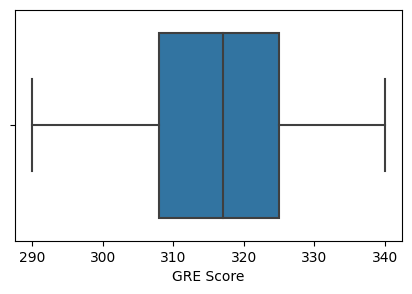

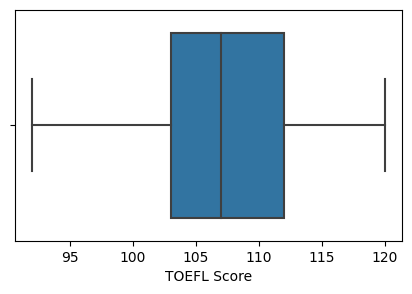

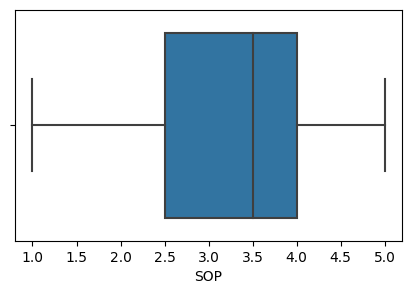

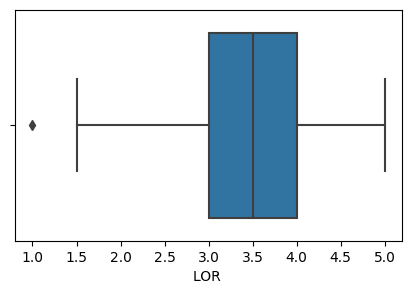

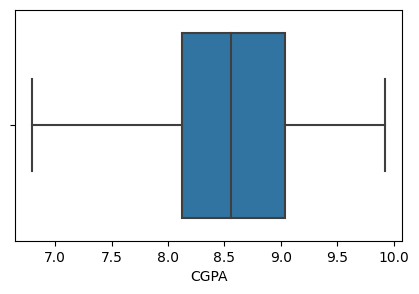

In [174]:

for j in numerical_columns:
    plt.figure(figsize= (5,3))

    sns.boxplot(data[j])

plt.show()

Dataset contain no outliers expect in LOR

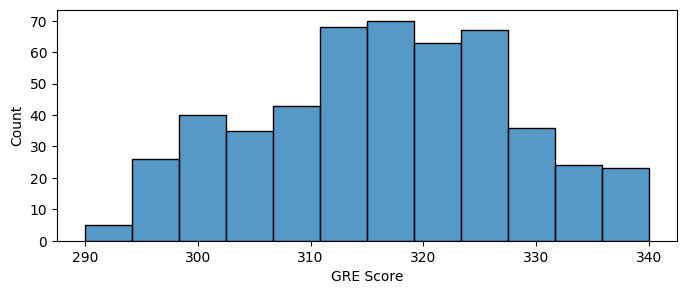

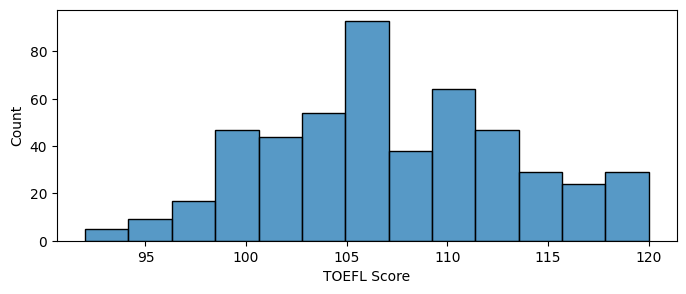

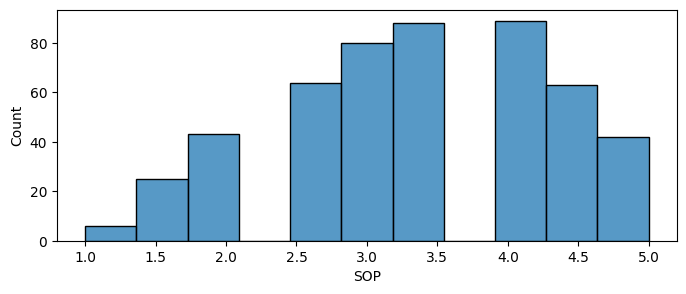

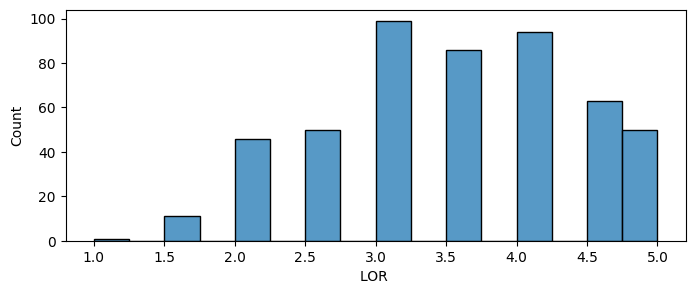

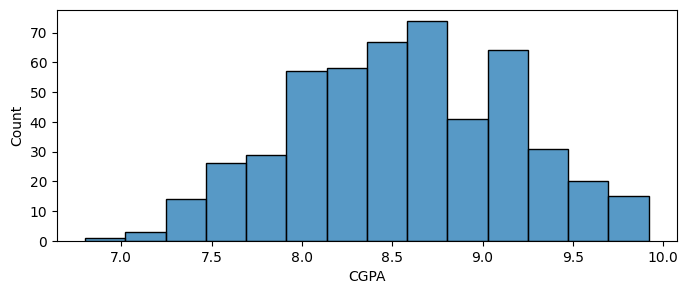

In [14]:
for j in numerical_columns:
    plt.figure(figsize= (8,3))

    sns.histplot(data[j])

plt.show()

Numerical data is normally distributed.

In [3]:
for col in category_columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(y='Chance of Admit ',x=col, data=data)
    plt.title(col +' vs Chance of Admit')
    plt.show()

NameError: name 'numerical_columns' is not defined

Chance of Admit increase with Research experience and Unversity rating.

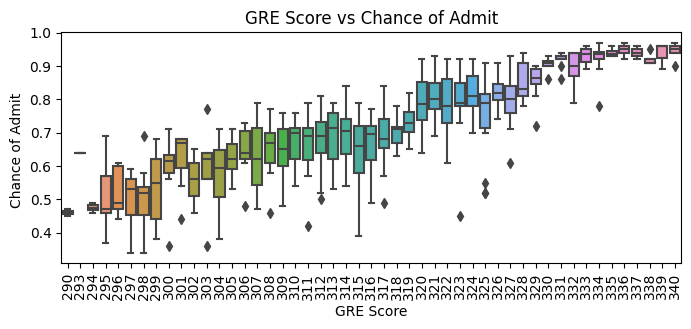

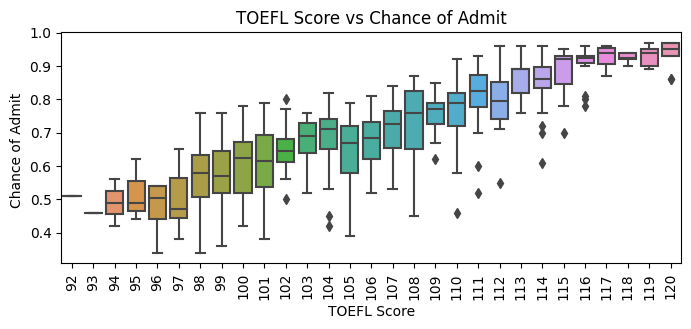

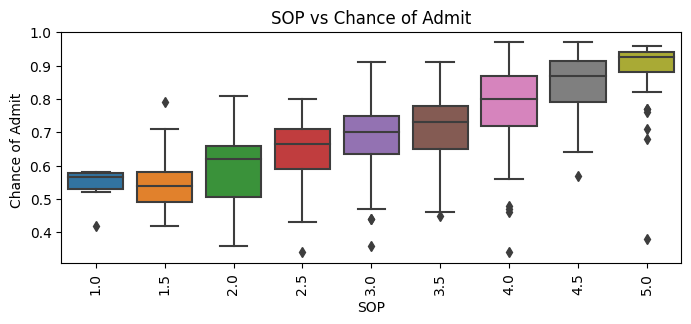

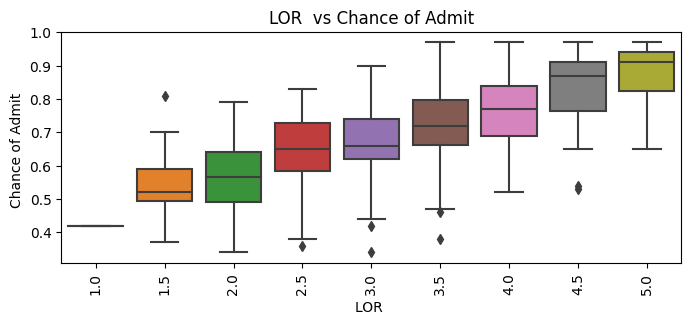

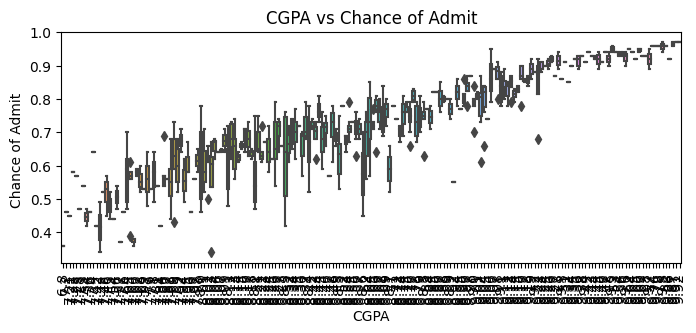

In [16]:
for col in numerical_columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(y='Chance of Admit ',x=col, data=data)
    plt.xticks(rotation = 90)
    plt.title(col +' vs Chance of Admit')
    plt.show()

Chance of Admit increase with TOEFL, GRE, CGPA, LOR, SOP.

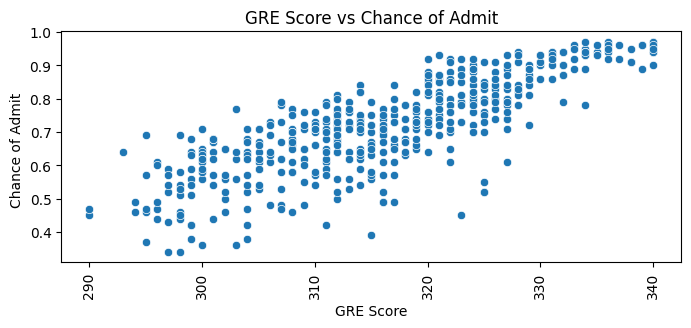

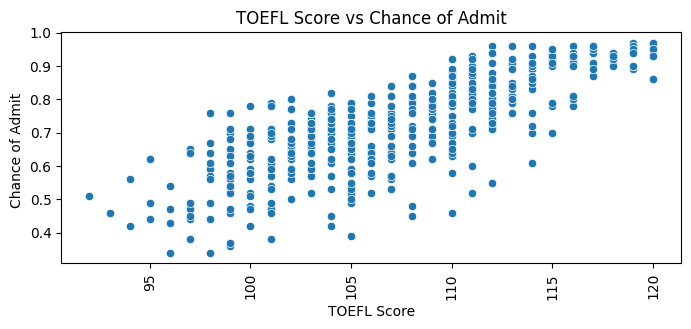

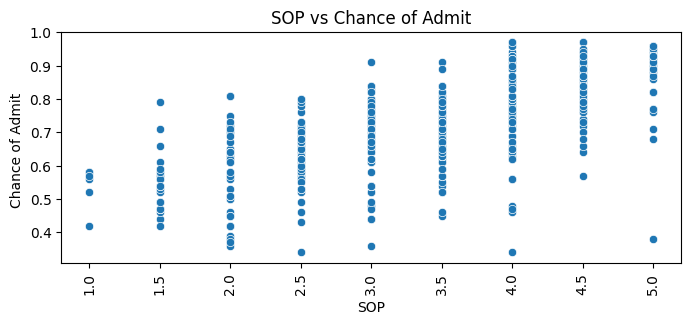

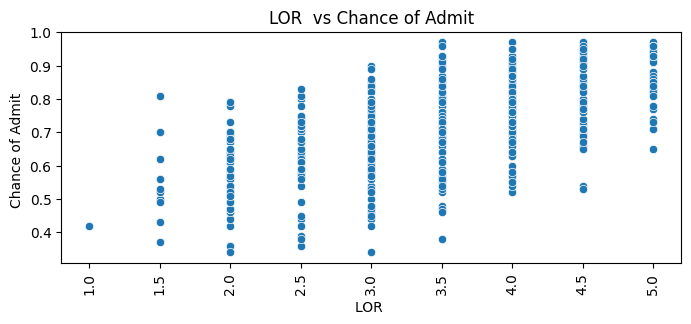

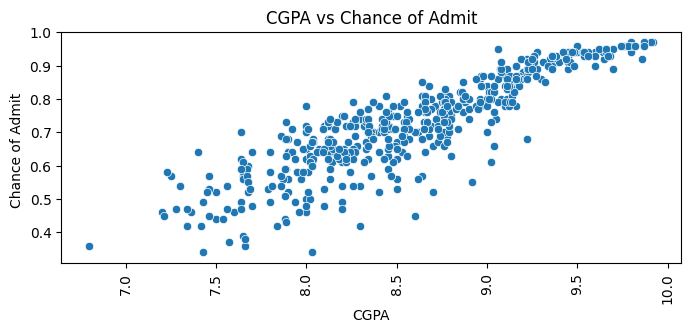

In [17]:
for col in numerical_columns:
    plt.figure(figsize=(8,3))
    sns.scatterplot(y='Chance of Admit ',x=col, data=data)
    plt.xticks(rotation = 90)
    plt.title(col+ ' vs Chance of Admit')
    plt.show()

Chance of Admission increses with high GRE, TOEFL and CGPA.

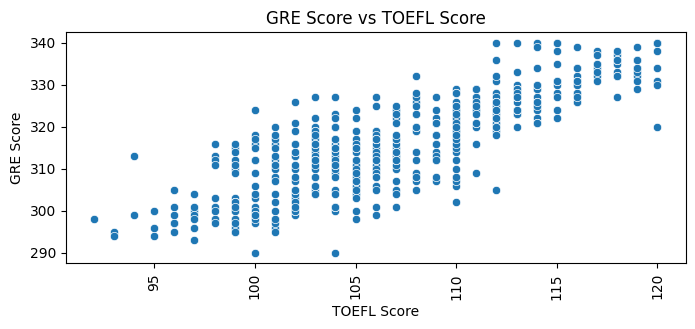

In [155]:

plt.figure(figsize=(8,3))
sns.scatterplot(y='GRE Score',x='TOEFL Score', data=data)
plt.xticks(rotation = 90)
plt.title('GRE Score vs TOEFL Score')
plt.show()

People having higher GRE Scores have also highest TOEFL Scores.

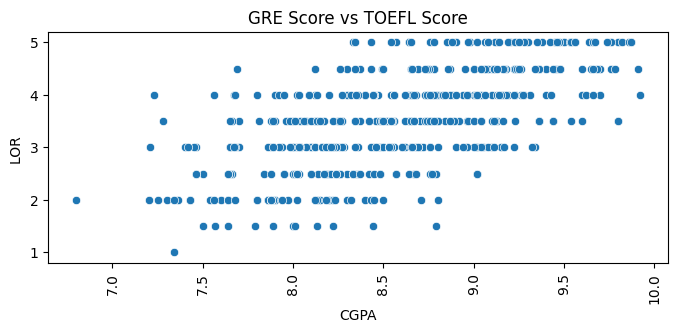

In [158]:
plt.figure(figsize=(8,3))
sns.scatterplot(y='LOR ',x='CGPA', data=data)
plt.xticks(rotation = 90)
plt.title('GRE Score vs TOEFL Score')
plt.show()

Student having higher CGPA has good LOR.

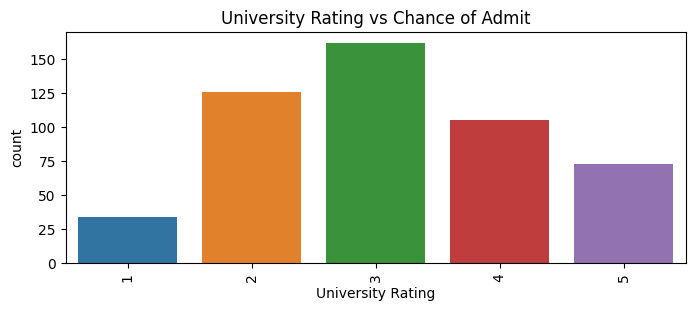

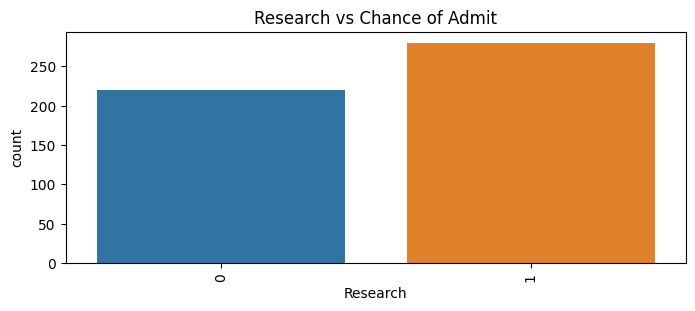

In [18]:
for col in category_columns:
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation = 90)
    plt.title(col+ ' vs Chance of Admit')
    plt.show()

- University rating is normally distributed.
- More number of students have research experences.

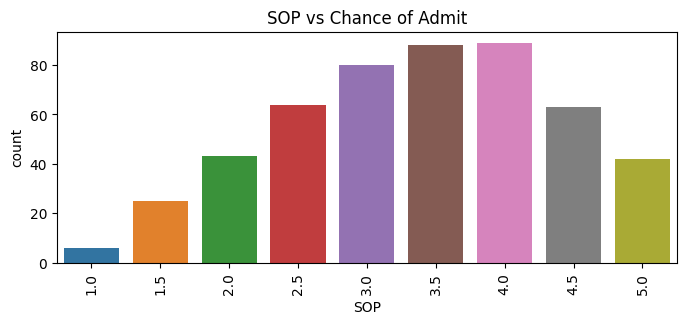

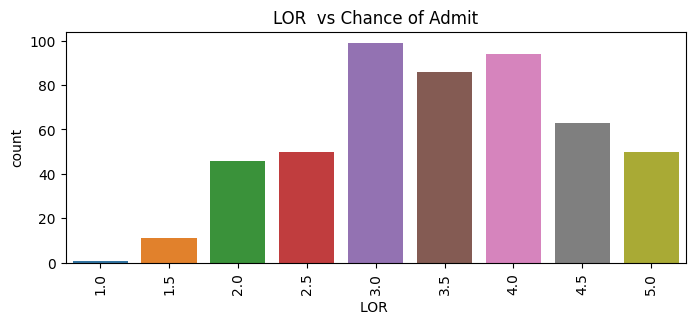

In [19]:
for col in ['SOP', 'LOR ']:
    plt.figure(figsize=(8,3))
    sns.countplot(x=col, data=data)
    plt.xticks(rotation = 90)
    plt.title(col+ ' vs Chance of Admit')
    plt.show()

- Most of the Students have SOP between 2.5 and 4.5.
- Most of the Students have LOR between 3 and 4.5.

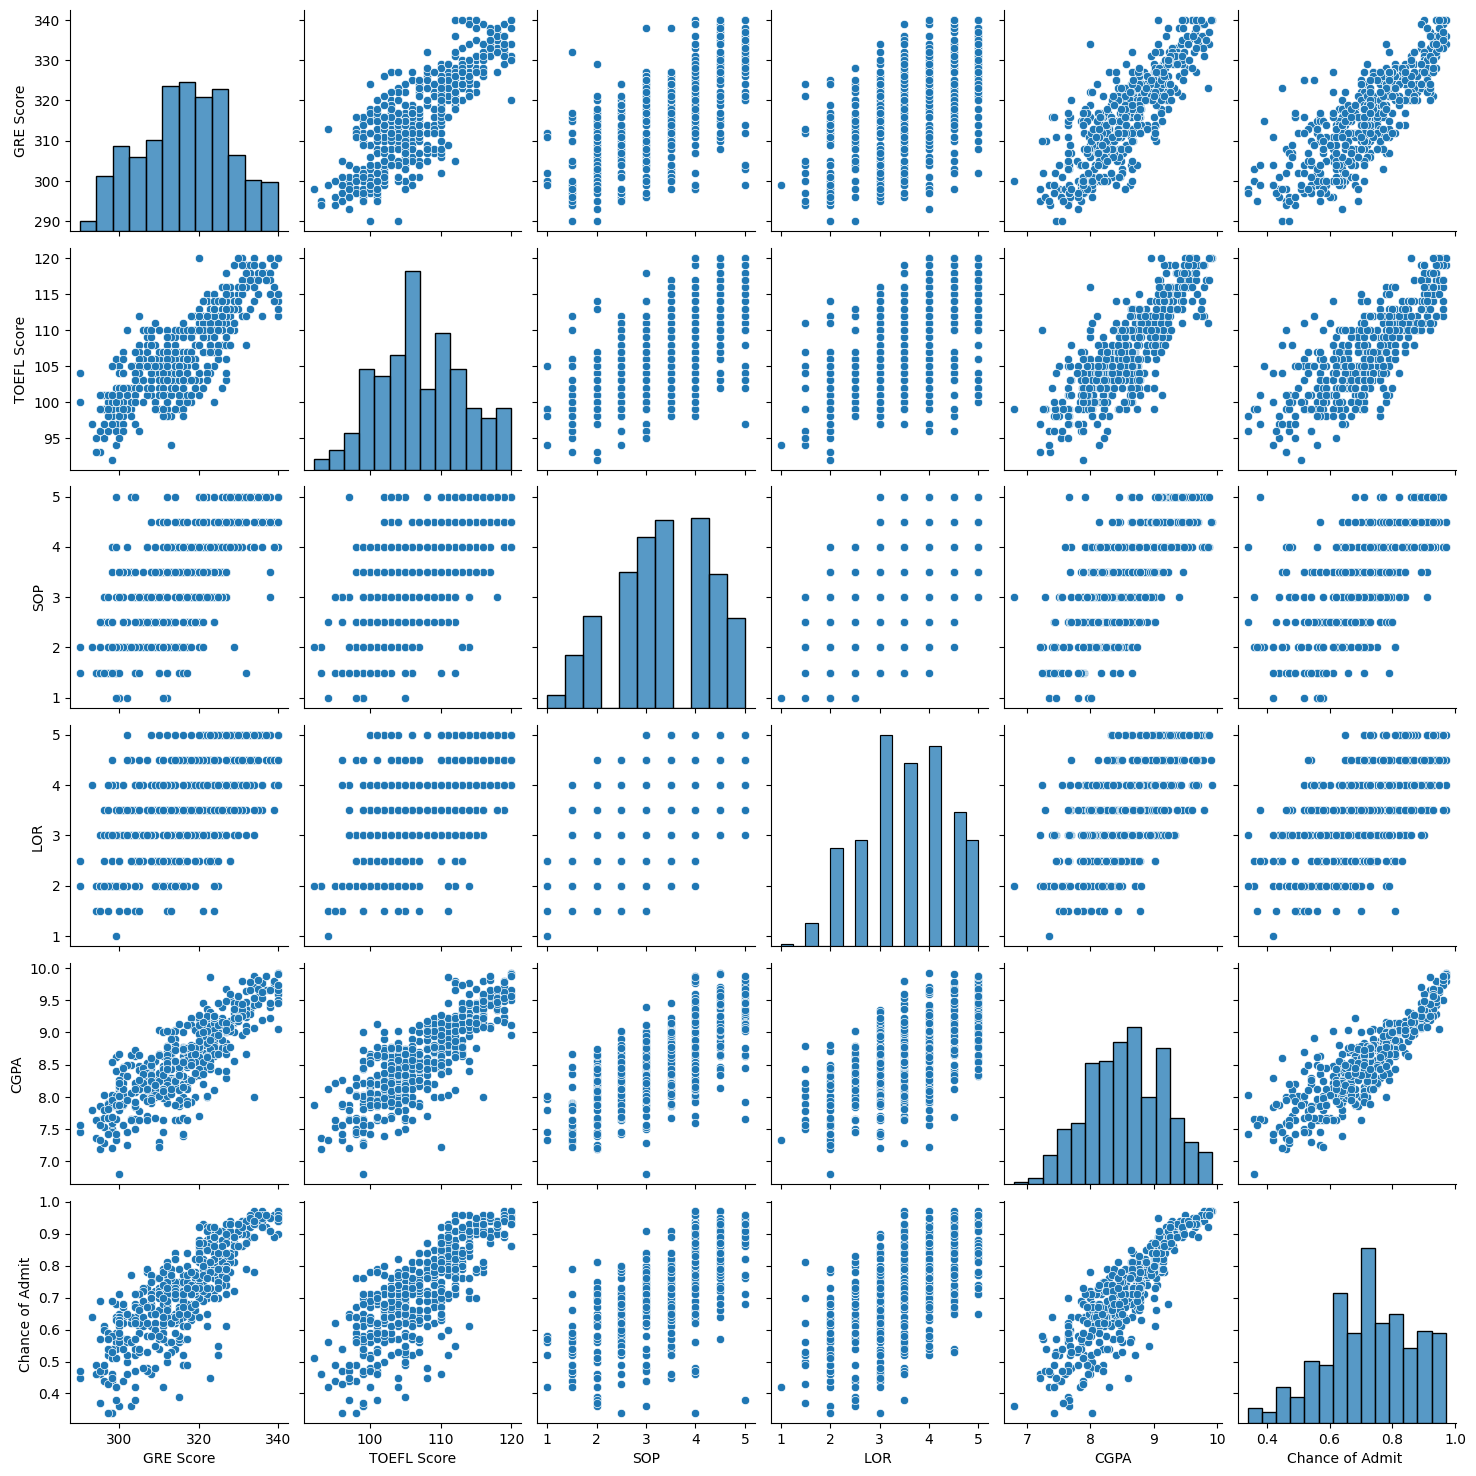

In [20]:
sns.pairplot(data=data)
plt.show()

Chance of Admit is highly correlated with GRE Score, TOEFL Score and CGPA.

### Correlation
Now lets look at the correlations of numerical features with each other

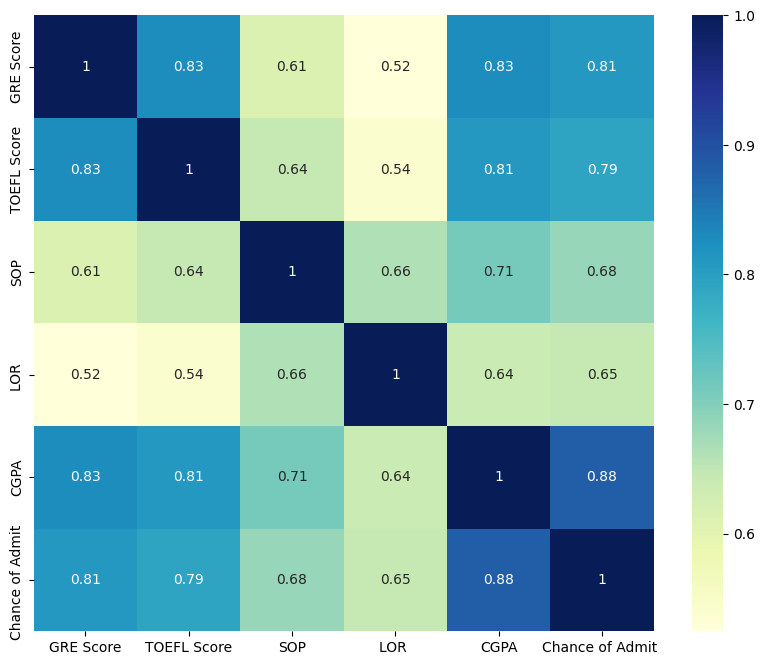

In [21]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

- Chance of Admit is Strong correlation with GRE Score, TOEFL Score and CGPA.
- Chance of Admit is moderately correlated with LOR and SOP.

Percentage constituents of columns

In [22]:
data['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

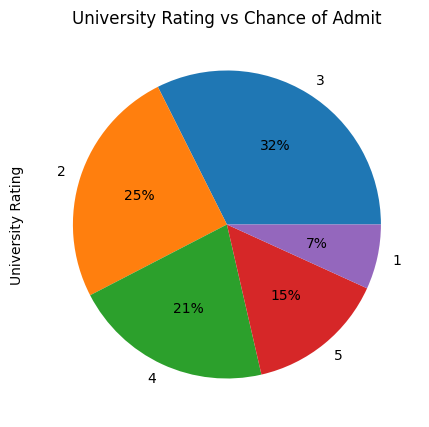

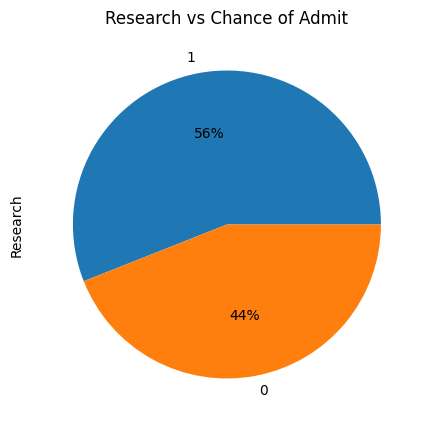

In [23]:
for col in category_columns:
    plt.figure(figsize=(8,3))
    data[col].value_counts().plot(kind= 'pie', figsize=(8,5), autopct= '%1.0f%%')
    plt.xticks(rotation = 90)
    plt.title(col+ ' vs Chance of Admit')
    plt.show()

- 56% Students have research experince.
- 32% students are having University ranking 3.

# Outlier treatment

In [175]:
df = data.copy()
for i,j in enumerate(numerical_columns):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1

    df=df[(df[j]>=q1-1.5*iqr)&(df[j]<=q3+1.5*iqr)]

In [176]:
df.shape

(499, 8)

One row has been removed as outliers

### Data preparation for modeling

In [177]:
X = df[df.columns.drop('Chance of Admit ')]
Y = df["Chance of Admit "] 
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [178]:
#random_state is the seed used by the random number generator, it can be any integer.

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 , random_state=100)

In [179]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
205,295,99,2,2.5,3.0,7.65,0
446,327,118,4,5.0,5.0,9.67,1
321,323,104,3,4.0,4.0,8.44,1
369,301,98,1,2.0,3.0,8.03,1
55,320,103,3,3.0,3.0,7.70,0
...,...,...,...,...,...,...,...
343,305,103,2,2.5,3.5,8.13,0
360,322,110,3,4.0,5.0,8.64,1
323,305,102,2,2.0,2.5,8.18,0
280,311,102,3,4.5,4.0,8.64,1


In [180]:

# Lets scale the data, standardization 
X_train_scaled = X_train.copy()
sc = StandardScaler()
cols = X_train_scaled.columns
X_train_scaled[cols] = sc.fit_transform(X_train_scaled[cols])

X_sm = sm.add_constant(X_train_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.34e-140
Time:                        23:30:50   Log-Likelihood:                 561.73
No. Observations:                 399   AIC:                            -1107.
Df Residuals:                     391   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7177      0.00

- Adjusted R2 is 0.815 which is 0.003 less than R-squared.
- The adjusted R2 "penalizes" us for adding the extra predictor variables that don't improve the existing model. 

In [181]:
sm_model.params.values
sc.inverse_transform([sm_model.params.values[1:]])

array([[316.46116008, 107.19124022,   3.11196207,   3.35836911,
          3.4892141 ,   8.62705809,   0.56071245]])

Our model equation looks like:
- Chance of Admit = 316.4* GRE Score + 107.1* TOEFL Score + 3.1* University Rating +  3.3* SOP  + 3.4* LOR +  8.6* CGPA  + 0.56* Research + 0.717

In terms of scaled parameter Our model equation looks like:
- Chance of Admit = 0.016* GRE Score + 0.017* TOEFL Score + 0.006* University Rating +  -0.001* SOP  + 0.017* LOR +  0.074* CGPA  + 0.013* Research + 0.717
- Top 3 most significant features are CGPA, GRE Score, TOEFL Score.

In [182]:
print(X_train_scaled)
print()
print(y_test)

X_sm


     GRE Score  TOEFL Score  University Rating       SOP      LOR       CGPA  \
205  -1.890234    -1.341158          -0.983826 -0.888938 -0.519306 -1.577678   
446   0.953469     1.809545           0.796431  1.696239  1.673320  1.837510   
321   0.598006    -0.512026          -0.093698  0.662168  0.577007 -0.242035   
369  -1.357040    -1.506984          -1.873955 -1.405974 -0.519306 -0.935217   
55    0.331409    -0.677852          -0.093698 -0.371903 -0.519306 -1.493144   
..         ...          ...                ...       ...       ...       ...   
343  -1.001577    -0.677852          -0.983826 -0.888938  0.028850 -0.766148   
360   0.509140     0.482933          -0.093698  0.662168  1.673320  0.096102   
323  -1.001577    -0.843678          -0.983826 -1.405974 -1.067463 -0.681614   
280  -0.468383    -0.843678          -0.093698  1.179204  0.577007  0.096102   
8    -1.268174    -0.843678          -1.873955 -1.405974 -2.163776 -0.985938   

     Research  
205 -1.114259  
446  0.

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
205,1.0,-1.890234,-1.341158,-0.983826,-0.888938,-0.519306,-1.577678,-1.114259
446,1.0,0.953469,1.809545,0.796431,1.696239,1.673320,1.837510,0.897457
321,1.0,0.598006,-0.512026,-0.093698,0.662168,0.577007,-0.242035,0.897457
369,1.0,-1.357040,-1.506984,-1.873955,-1.405974,-0.519306,-0.935217,0.897457
55,1.0,0.331409,-0.677852,-0.093698,-0.371903,-0.519306,-1.493144,-1.114259
...,...,...,...,...,...,...,...,...
343,1.0,-1.001577,-0.677852,-0.983826,-0.888938,0.028850,-0.766148,-1.114259
360,1.0,0.509140,0.482933,-0.093698,0.662168,1.673320,0.096102,0.897457
323,1.0,-1.001577,-0.843678,-0.983826,-1.405974,-1.067463,-0.681614,-1.114259
280,1.0,-0.468383,-0.843678,-0.093698,1.179204,0.577007,0.096102,0.897457


In [183]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

array([[ 1.04233482,  1.31206538,  0.79643069,  1.17920372,  0.57700691,
         0.97525966,  0.89745744],
       [-0.55724823, -1.34115774, -0.98382614, -1.92300915, -1.61561936,
        -2.16941884, -1.11425896],
       [-0.46838251, -0.67785196, -0.09369773, -1.40597367,  0.57700691,
        -0.83377582, -1.11425896],
       [ 1.39779772,  0.15128027,  1.6865591 ,  1.17920372,  0.57700691,
         0.73856343,  0.89745744],
       [ 0.50914047,  0.48293316, -0.09369773, -0.37190271,  0.02885035,
        -0.98593768, -1.11425896],
       [ 0.68687192,  0.81458605,  1.6865591 ,  1.6962392 ,  1.67332005,
         0.84000467,  0.89745744],
       [-1.09044258, -0.01454618, -0.09369773,  0.14513277, -0.51930622,
        -1.22263391, -1.11425896],
       [-0.02405388, -0.18037262, -0.98382614, -0.88893819,  0.57700691,
        -0.44491773, -1.11425896],
       [ 1.13120054,  0.48293316, -0.98382614,  0.66216824, -0.51930622,
         0.95835278,  0.89745744],
       [-1.44590548, -1.1753

In [184]:
X_test_scaled_sm = sm.add_constant(X_test_scaled)
y_hat = sm_model.predict(X_test_scaled_sm)
y_hat

array([0.85556116, 0.47806297, 0.63204152, 0.8293914 , 0.64652   ,
       0.85425407, 0.58331815, 0.67097238, 0.81298074, 0.68744766,
       0.66351964, 0.61483936, 0.89186925, 0.61018258, 0.63383477,
       0.47063258, 0.52855375, 0.75563383, 0.56193501, 0.51938708,
       0.89630552, 0.81802039, 0.84458682, 0.90269632, 0.99257219,
       0.58802303, 0.6828687 , 0.55933549, 0.85525769, 0.70735618,
       0.7864169 , 0.6416549 , 0.69368471, 0.60325851, 0.73887727,
       0.78409862, 0.7937982 , 0.58219397, 0.53821953, 0.70423071,
       0.94526731, 0.53309128, 0.60527333, 0.5364598 , 0.81048677,
       0.54245631, 0.59816856, 0.87501995, 0.86155198, 0.60373269,
       0.66237989, 0.71641453, 0.80941343, 0.93670522, 0.64307502,
       0.87632256, 0.62690405, 0.89165206, 0.9778935 , 0.73935992,
       0.73948093, 0.76301645, 0.48043853, 0.88114607, 0.62512397,
       0.68502008, 0.70299248, 0.46491186, 0.67491023, 0.84346518,
       0.92436164, 0.57728521, 0.6609865 , 0.83211058, 0.64936

## Testing the assumptions of the linear regression model
### Multicollinearity check by VIF score 

In [185]:
vif = pd.DataFrame()
X_t = X_train_scaled
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.84
0,GRE Score,4.68
1,TOEFL Score,3.80
3,SOP,2.68
2,University Rating,2.47
4,LOR,1.97
6,Research,1.47


since all the column have VIF score less than 5, we are not removing any column.

### Normality of residuals

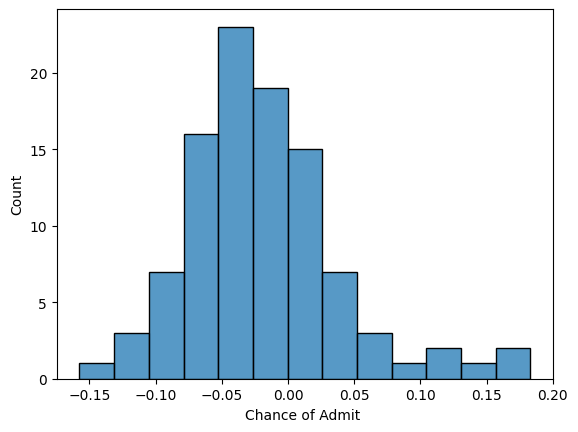

In [186]:

error = y_hat -y_test 
sns.histplot(error)
plt.show()

[]

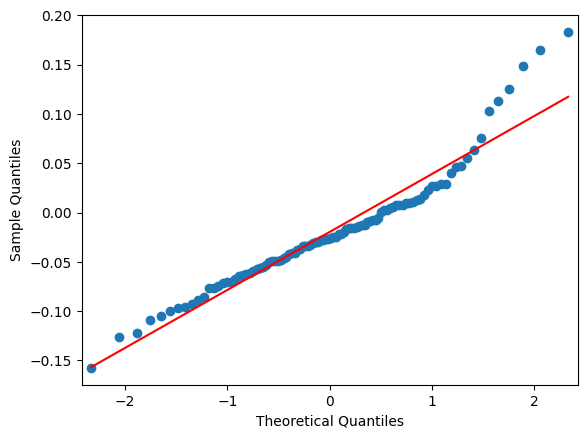

In [187]:
sm.qqplot(error, line = 's')
plt.plot()

Error are not normally distributed. There are outliers present in the errors

### The mean of residuals

In [194]:
error.describe()

count    100.000000
mean      -0.019719
std        0.059096
min       -0.157544
25%       -0.055451
50%       -0.026244
75%        0.007646
max        0.183075
Name: Chance of Admit , dtype: float64

Mean of residuals is almost 0.

### Linearity of variables (no pattern in the residual plot)

Text(0, 0.5, 'Sales')

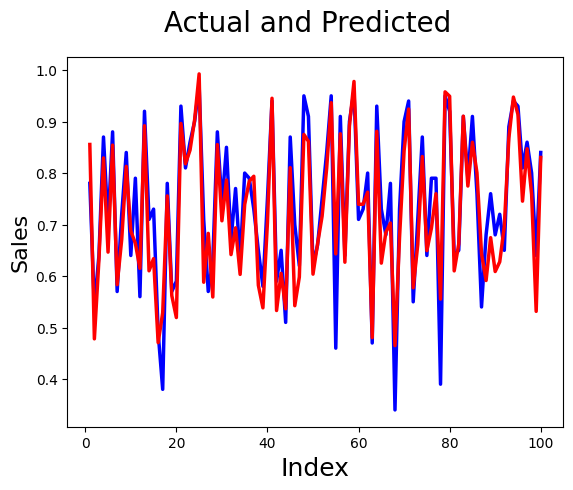

In [195]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,101,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_hat, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

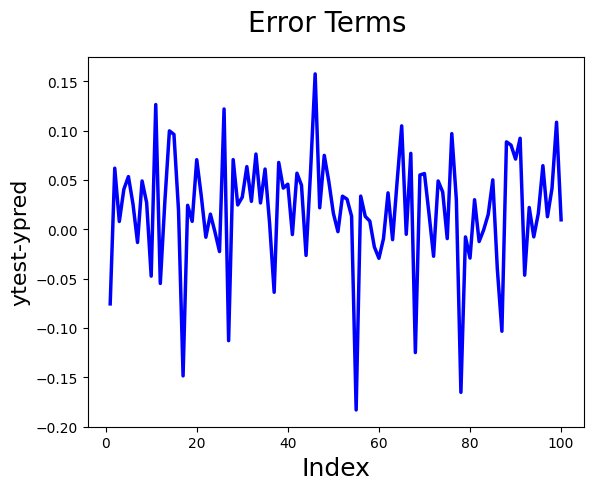

In [196]:
# Error terms
c = [i for i in range(1,101,1)]
fig = plt.figure()
plt.plot(c,y_test-y_hat, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

There is no pattern in residual plot

### Test for Homoscedasticity

Text(0, 0.5, 'Predicted Y')

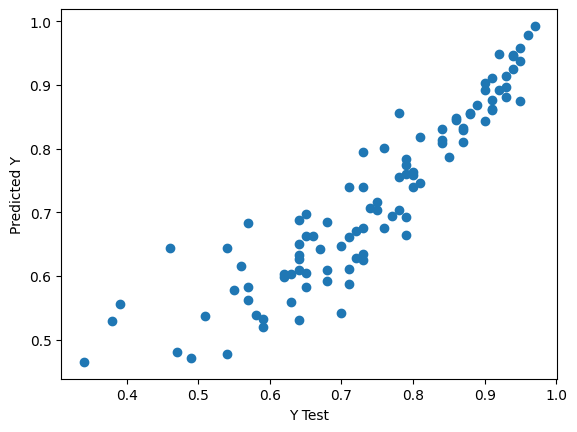

In [197]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_hat)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Errors')

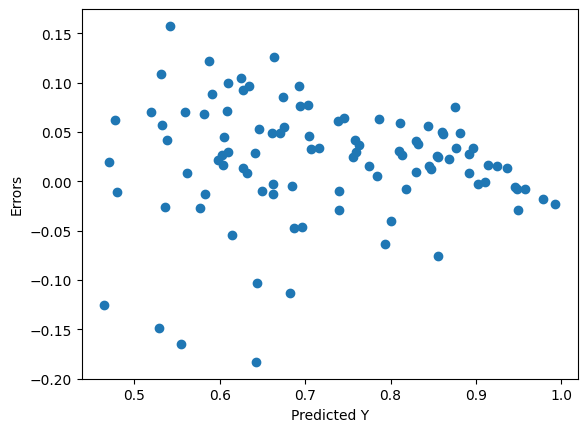

In [198]:
import matplotlib.pyplot as plt
plt.scatter(y_hat,y_test-y_hat)
plt.xlabel('Predicted Y')
plt.ylabel('Errors')

Heteroscedasticy is present in data. Outliers are present in data


## Model performance evaluation 
### Metrics checked - MAE, RMSE, R2, Adj R2

In [199]:
# R2 and Adjusted R2
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.8
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.34e-140
Time:                        23:32:05   Log-Likelihood:                 561.73
No. Observations:                 399   AIC:                            -1107.
Df Residuals:                     391   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7177      0.00

#### MSE , RMSE and Mean Absolute % error

In [200]:
MSE = np.mean(error**2)
print('MSE =', MSE)
RMSE = np.sqrt(MSE)
print('RMSE = ', RMSE)


MSE = 0.003846305670850936
RMSE =  0.0620185913323653


In [201]:
# Mean Absolute error
print('Mean Absolute Error=',np.mean(np.abs(y_hat-y_test)))

Mean Absolute Error= 0.047987064850490514


In [202]:
# Mean Absolute % error
print('Mean Absolute % Error=',np.mean(np.abs(y_hat-y_test)/y_test)*100 , "%")

Mean Absolute % Error= 7.393297701544772 %


## Try out Lasso and Ridge regression

In [203]:

model = Lasso()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3 , random_state=1)
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)
search = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
# perform the search
results = search.fit(X_train, y_train)


# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.043
Config: {'alpha': 0.0}


MAE for Lasso regression has decresed to 0.043. Earlier it was 0.0479.
Our model has performed better using Lasso regularisation.

In [204]:
model = Ridge()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3 , random_state=1)
grid = dict()
grid['alpha'] = np.arange(0,1,0.01)
search_ridge = GridSearchCV(model, grid, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs = -1)
# perform the search
results_ridge = search_ridge.fit(X_train, y_train)


# summarize
print('MAE: %.3f' % results_ridge.best_score_)
print('Config: %s' % results_ridge.best_params_)

MAE: -0.043
Config: {'alpha': 0.43}


- Both Ridge and Lasso regularisation have same MAE.
- It means we can use any of these for our dataset.

## Actionable Insights & Recommendations 

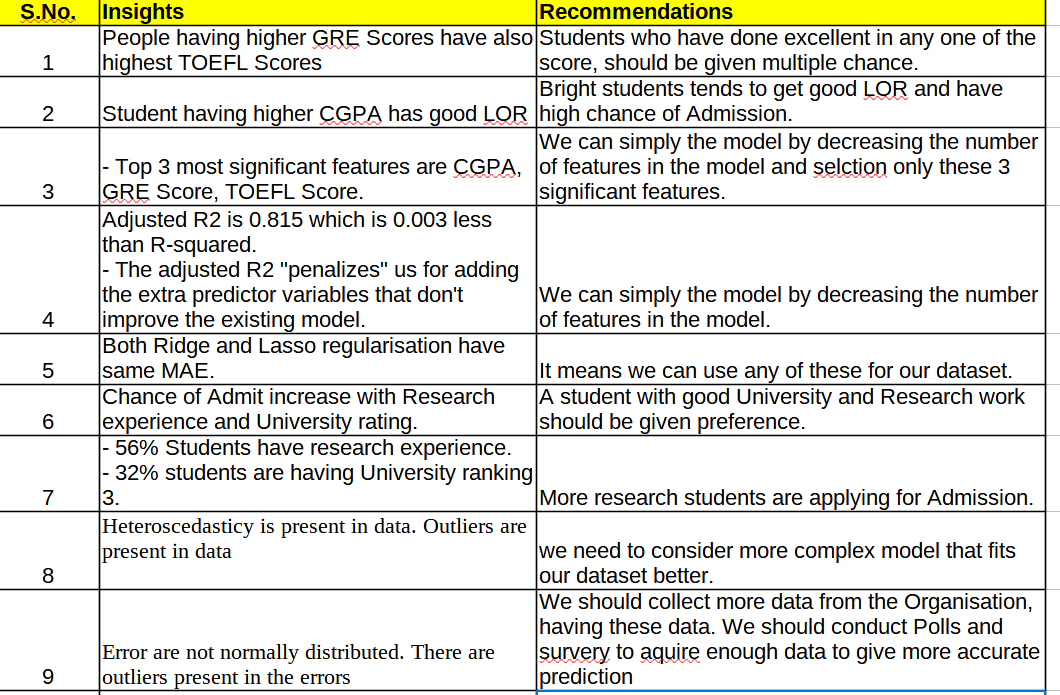